In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams
from scipy.optimize import curve_fit

plt.style.use('ggplot')
rcParams['font.family'] = 'serif'
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 250
rcParams['lines.linewidth'] = 0.5
rcParams['lines.markersize'] = 1.5
rcParams['errorbar.capsize'] = 1.5
rcParams['figure.constrained_layout.use'] = True
rcParams['figure.figsize'] = [1.61803398875 * 6, 6]

In [2]:
files = os.listdir('output-activesite/')
sim_time = np.zeros(len(files))

for i, file in enumerate(files):
    sim_time[i] = np.load(f"output-activesite/{file}").shape[0]

plt.hist(sim_time[sim_time < 5000], bins = 85)
plt.savefig('gol_sim_time_hist.png', format = 'png')
plt.clf()

<Figure size 970.82x600 with 0 Axes>

In [3]:
def linear(x, m, c):
    return m*x + c

0.2500122100105743 0.24986774818405996


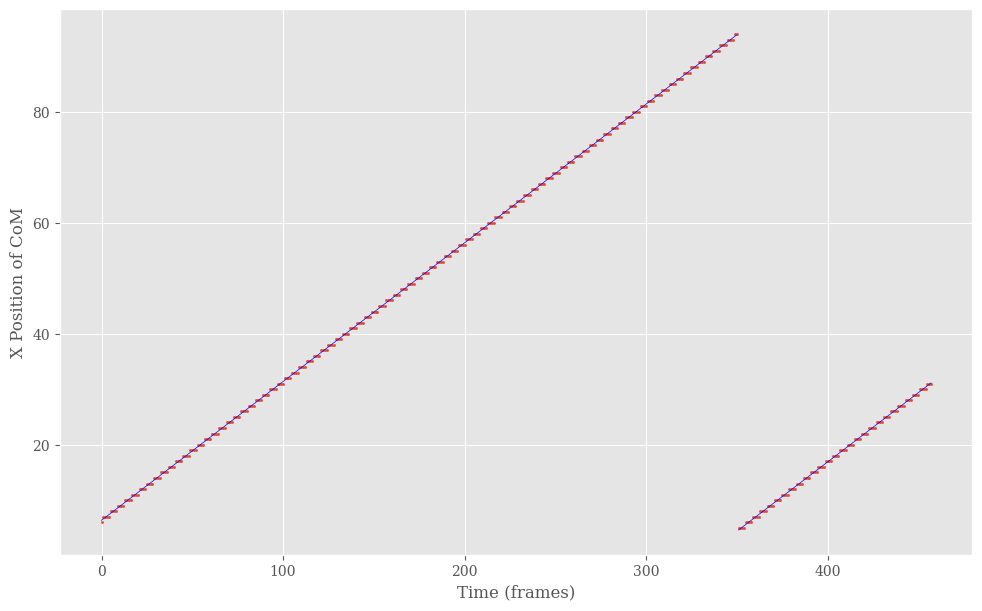

0.24998778998615356 0.25013225180580534


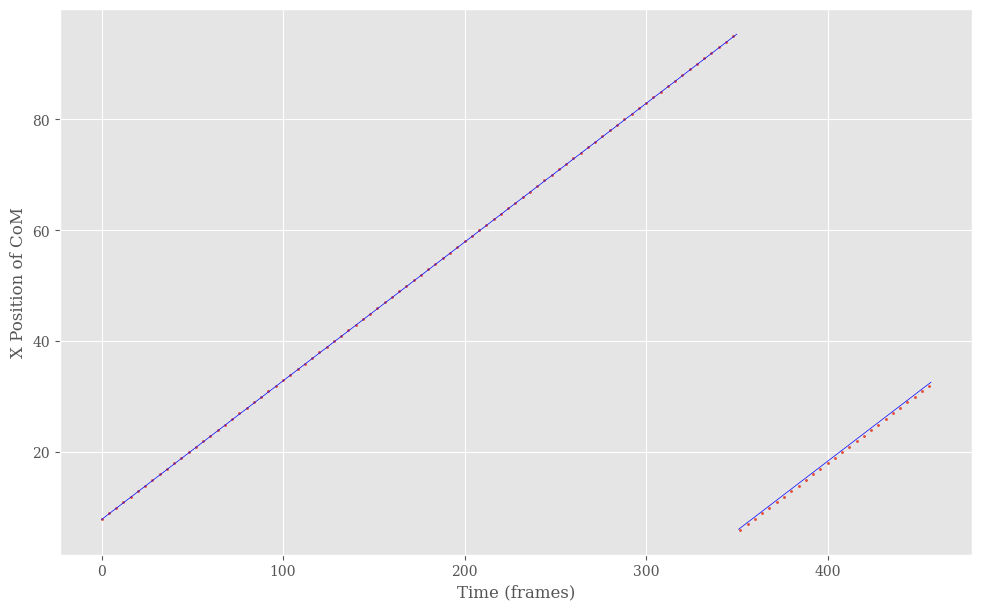

Velocity of Glider: 0.35355339101263433


In [6]:
glider_pos = np.load('glider_com_pos.npy')
t = np.linspace(0, glider_pos.shape[0]-1, glider_pos.shape[0], dtype = int)

x_pos = glider_pos[:,0]

y_pos = glider_pos[:,1]

x_pos_1 = x_pos[:351]
x_pos_2 = x_pos[351:]

popt_x, popcv = curve_fit(linear, t[:351], x_pos_1)

popt_x2, popcv = curve_fit(linear, t[351:], x_pos_2)


print(popt_x[0], popt_x2[0])


plt.scatter(t, x_pos)
plt.plot(t[:351], linear(t[:351], *popt_x), color = 'b')
plt.plot(t[351:], linear(t[351:], *popt_x2), color = 'b')
plt.xlabel('Time (frames)')
plt.ylabel('X Position of CoM')
plt.show()

y_pos_1 = y_pos[:351]
y_pos_2 = y_pos[351:]

popt_y, popcv = curve_fit(linear, t[:351], y_pos_1)

popt_y2, popcv = curve_fit(linear, t[351:], y_pos_2)

print(popt_y[0], popt_y2[0])


plt.scatter(t[::4], y_pos[::4])
plt.plot(t[:351], linear(t[:351], *popt_y), color = 'b')
plt.plot(t[351:], linear(t[351:], *popt_y2), color = 'b')
plt.xlabel('Time (frames)')
plt.ylabel('X Position of CoM')
plt.show()

print(f"Velocity of Glider: {np.sqrt(popt_y[0]**2 + popt_x[0]**2)}")